# [과제]
- 다중공선성, 과적합, 종속변수의 정규성 등을 고려하여 전처리 후 회귀분석 모델링, 학습 및 평가를 수행하세요.
- 모델링은 하이퍼 파라미터 옵션 포함하여 학습한 모든 방법 고려하여 수행

### imported modules

In [135]:
# basic module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sepearte module
from sklearn.model_selection import train_test_split

# machine Learning modules (Regression)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# machine Learning modules (Regression-trees)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# machine Learning evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Developing
from sklearn.model_selection import GridSearchCV

### data load

In [136]:
from sklearn.datasets import load_boston
house = load_boston()
house.keys()

house_df = pd.DataFrame(house.data, columns= house.feature_names)
house_df.to_pickle('../Data/house_df.pkl')
house_df = pd.read_pickle('../Data/house_df.pkl')
house_df['PRICE'] = house.target
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### EDA

In [137]:
display(house_df.shape)
house_df.info()

(506, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<AxesSubplot:>

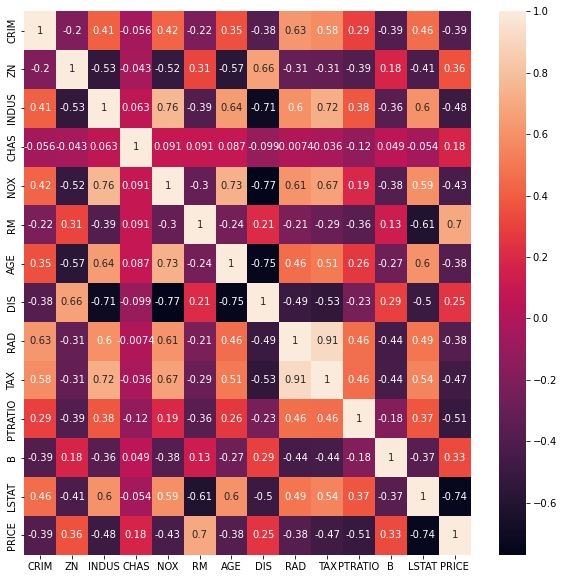

In [138]:
hc = house_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(hc,annot=True)

In [173]:
def get_corr(df, upper_condition_n, most_up_condition_n):
    cr = df.corr()
    plt.figure(figsize=(10,10))
    print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values(kind='quicksort')
    print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    print(dict(cond).keys())

AxesSubplot(0.125,0.125;0.62x0.755)

 NOX    DIS     -0.769230
DIS    NOX     -0.769230
       AGE     -0.747881
AGE    DIS     -0.747881
LSTAT  PRICE   -0.737663
                  ...   
CHAS   CHAS     1.000000
INDUS  INDUS    1.000000
ZN     ZN       1.000000
LSTAT  LSTAT    1.000000
PRICE  PRICE    1.000000
Length: 196, dtype: float64 

dict_keys(['NOX', 'DIS', 'AGE', 'LSTAT', 'PRICE', 'INDUS', 'TAX', 'RAD'])


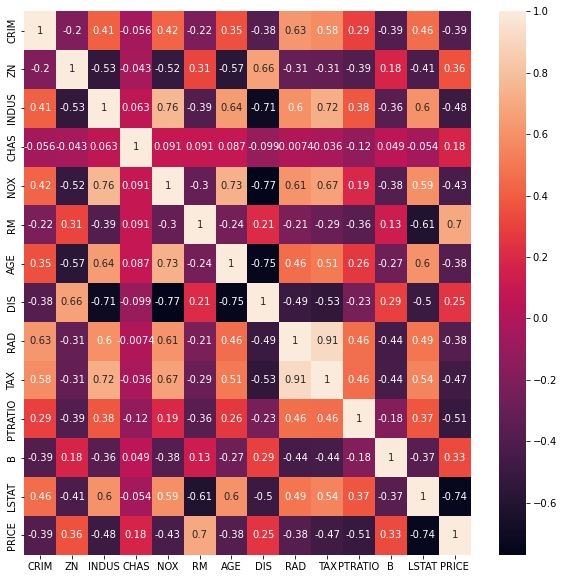

In [174]:
get_corr(house_df,0.7,1)

### collinearity

In [189]:
# drop higher collinerarity
import statsmodels.formula.api as smf
model = smf.ols(formula='PRICE ~ ' + '+'.join(X.columns),data=house_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     101.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          9.75e-125
Time:                        01:41:49   Log-Likelihood:                -1525.5
No. Observations:                 506   AIC:                             3077.
Df Residuals:                     493   BIC:                             3132.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.0244      5.023      4.584      0.0

In [190]:
# Strong multicollinerity

In [191]:
X = house_df.drop(['NOX', 'DIS', 'AGE', 'LSTAT', 'PRICE', 'INDUS', 'TAX', 'RAD'],axis=1)
y = house_df['PRICE']

### sepearte

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Machine Learning models

#### Regression

In [193]:
# Linear_
lr = LinearRegression()

# Regulation_
ridge = Ridge()
lasso = Lasso()
ela = ElasticNet()

#### Regression Tree

In [194]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
lgb = LGBMRegressor()

### Fitting

In [195]:
models = [lr,ridge,lasso,ela,dt,rf,gbr,xgb,lgb]
for model in models:
    model.fit(X_train,y_train)

### predict

In [196]:
lr_pred = lr.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
ela_pred = ela.predict(X_test)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gbr_pred = gbr.predict(X_test)
xgb_pred = xgb.predict(X_test)
lgb_pred = lgb.predict(X_test)


### Evaluation

In [197]:
def evaluation(model_name,y_test,prediction,n_cv):
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,prediction)
    np.set_printoptions(precision=6, suppress=True)
    print('[model]:',model_name,'\n')
    print('[MSE] : {:.4f}, [RMSE] : {:.4f}, [r2] : {:.4f}'.format(mse,rmse,r2))
    print('[Intercept]:', lr.intercept_)
    print('[Coef_]:', np.round(lr.coef_,2),'\n')
    
    neg_mse_score = cross_val_score(model_name, X, y,scoring='neg_mean_squared_error',cv=n_cv)
    rmse_score = np.sqrt(-1*neg_mse_score)
    avg_rmse = np.mean(rmse_score)
    print('5 folds independent Negative MSE scores:', np.round(neg_mse_score,2))
    print('5 folds indenpendent RMSE scores:', np.round(rmse_score,2))
    print('5 folds Mean RMSE: {:.3f}'.format(avg_rmse))
    print('---' * 30)

#### Linear_Regression evaulation

In [199]:
# a = [1,2,3,4,5]
# b = [6,7,8,9,10]
# for x,y in zip(a,b):
#     print(x,y)

In [16]:
models = [lr,ridge,lasso,ela]
predictions = [lr_pred,ridge_pred,lasso_pred,ela_pred]

for a,b in zip(models,predictions):
    evaluation(a, y_test, b, 5)

[model]: LinearRegression() 

[MSE] : 30.1148, [RMSE] : 5.4877, [r2] : 0.6383
[Intercept]: 25.063717601256283
[Coef_]: [-0.09  0.    0.11  2.63 -9.13  4.34  0.02  0.24 -0.01 -1.18  0.01 -0.48] 

5 folds independent Negative MSE scores: [-12.15 -25.62 -38.6  -86.86 -36.76]
5 folds indenpendent RMSE scores: [3.49 5.06 6.21 9.32 6.06]
5 folds Mean RMSE: 6.029
------------------------------------------------------------------------------------------
[model]: Ridge() 

[MSE] : 30.2871, [RMSE] : 5.5034, [r2] : 0.6363
[Intercept]: 25.063717601256283
[Coef_]: [-0.09  0.    0.11  2.63 -9.13  4.34  0.02  0.24 -0.01 -1.18  0.01 -0.48] 

5 folds independent Negative MSE scores: [-11.37 -26.1  -35.16 -86.1  -35.53]
5 folds indenpendent RMSE scores: [3.37 5.11 5.93 9.28 5.96]
5 folds Mean RMSE: 5.930
------------------------------------------------------------------------------------------
[model]: Lasso() 

[MSE] : 33.8173, [RMSE] : 5.8153, [r2] : 0.5939
[Intercept]: 25.063717601256283
[Coef_]: [-0

##### Linear_Regression

In [17]:
evaluation(lr,y_test,lr_pred,5)

[model]: LinearRegression() 

[MSE] : 30.1148, [RMSE] : 5.4877, [r2] : 0.6383
[Intercept]: 25.063717601256283
[Coef_]: [-0.09  0.    0.11  2.63 -9.13  4.34  0.02  0.24 -0.01 -1.18  0.01 -0.48] 

5 folds independent Negative MSE scores: [-12.15 -25.62 -38.6  -86.86 -36.76]
5 folds indenpendent RMSE scores: [3.49 5.06 6.21 9.32 6.06]
5 folds Mean RMSE: 6.029
------------------------------------------------------------------------------------------


In [202]:
ela_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = reg_evaluation('ElasticNet',params=ela_alphas,X_data_n=X,y_target_n=y)
sort_column ='alpha:' + str(ela_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

[model] : ElasticNet 

alpha : 0.07  (5 folds) RMSE means : 5.9419
alpha : 0.1  (5 folds) RMSE means : 5.9496
alpha : 0.5  (5 folds) RMSE means : 6.1779
alpha : 1  (5 folds) RMSE means : 6.4967
alpha : 3  (5 folds) RMSE means : 7.3810


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,6.712745,6.542706,4.728725,3.296774,0.840639
CHAS,1.834386,1.456017,0.000000,0.000000,0.000000
ZN,0.023197,0.023934,0.035608,0.047550,0.074504
B,0.016531,0.016596,0.017102,0.017503,0.018811
CRIM,-0.141198,-0.142951,-0.160250,-0.173437,-0.194926
PTRATIO,-0.957566,-0.970548,-1.040625,-1.029766,-0.781299


##### Regression_Tree 

In [169]:
models = [dt,rf,gbr,xgb,lgb]
predictions = [dt_pred,rf_pred,gbr_pred,xgb_pred,lgb_pred]

for a,b in zip(models,predictions):
    evaluation(a, y_test, b, 5)

[model]: DecisionTreeRegressor() 

[MSE] : 56.2132, [RMSE] : 7.4975, [r2] : 0.3249
[Intercept]: -5.557440717761676
[Coef_]: [-0.18  0.02  3.1   6.91 -1.11  0.01] 

5 folds independent Negative MSE scores: [ -16.87  -22.55  -87.23  -96.2  -122.  ]
5 folds indenpendent RMSE scores: [ 4.11  4.75  9.34  9.81 11.05]
5 folds Mean RMSE: 7.810
------------------------------------------------------------------------------------------
[model]: RandomForestRegressor() 

[MSE] : 36.6306, [RMSE] : 6.0523, [r2] : 0.5601
[Intercept]: -5.557440717761676
[Coef_]: [-0.18  0.02  3.1   6.91 -1.11  0.01] 

5 folds independent Negative MSE scores: [ -9.38 -22.3  -18.06 -81.99 -79.6 ]
5 folds indenpendent RMSE scores: [3.06 4.72 4.25 9.06 8.92]
5 folds Mean RMSE: 6.002
------------------------------------------------------------------------------------------
[model]: GradientBoostingRegressor() 

[MSE] : 33.2408, [RMSE] : 5.7655, [r2] : 0.6008
[Intercept]: -5.557440717761676
[Coef_]: [-0.18  0.02  3.1   6.91

###### lasso / alpha 3 RMSE : 6.0681

### Best_parmas

In [215]:
# alpha = 3
lr_params = Lasso(alpha=3)

lr_params.fit(X_train,y_train)
lr_params_pred = lr_params.predict(X_test)

In [216]:
evaluation(lr_params,y_test,lr_params_pred,5)

[model]: Lasso(alpha=3) 

[MSE] : 62.2717, [RMSE] : 7.8912, [r2] : 0.2521
[Intercept]: -5.557440717761676
[Coef_]: [-0.18  0.02  3.1   6.91 -1.11  0.01] 

5 folds independent Negative MSE scores: [ -28.28  -66.61 -106.08  -80.94  -21.66]
5 folds indenpendent RMSE scores: [ 5.32  8.16 10.3   9.    4.65]
5 folds Mean RMSE: 7.486
------------------------------------------------------------------------------------------


### conclusion

Default Lasso - 7.4860
alpha 3 Lasso - 7.486

# [도전 과제]

캐글의 자전거 대여 수요 예측을 아래와 같이 수행하세요
- 데이터는 https://www.kaggle.com/c/bike-sharing-demand/data 에서 train.csv를 다운로드 받아 이용
- 문자열을 datetime 타입으로 변경
- 종속변수 정규성 개선위한 로그 변환
- 평가지표 : RMSLE, RMSE, MAE
- 'year', 'month', 'day', 'hour' 등의 피러들을 OneHotEncoding 하여 회귀모델의 예측 성능 비교

### module import

In [164]:
# basic module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sepearte module
from sklearn.model_selection import train_test_split

# machine Learning modules (Regression)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# machine Learning modules (Regression-trees)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# machine Learning evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Developing
from sklearn.model_selection import GridSearchCV

### Data load

In [165]:
bike = pd.read_csv('Data/train.csv')
display(bike.head())
print(bike.info())
print()
print(bike.isnull().sum())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


### Preprocessing

In [27]:
# str to datetime
bike["datetime"] = pd.to_datetime(bike["datetime"])

# seperate
bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike["minute"] = bike["datetime"].dt.minute
bike["second"] = bike["datetime"].dt.second

# sort
bike[["datetime", "year", "month", "day", "hour", "minute", "second"]].head()

print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

### EDA

<AxesSubplot:>

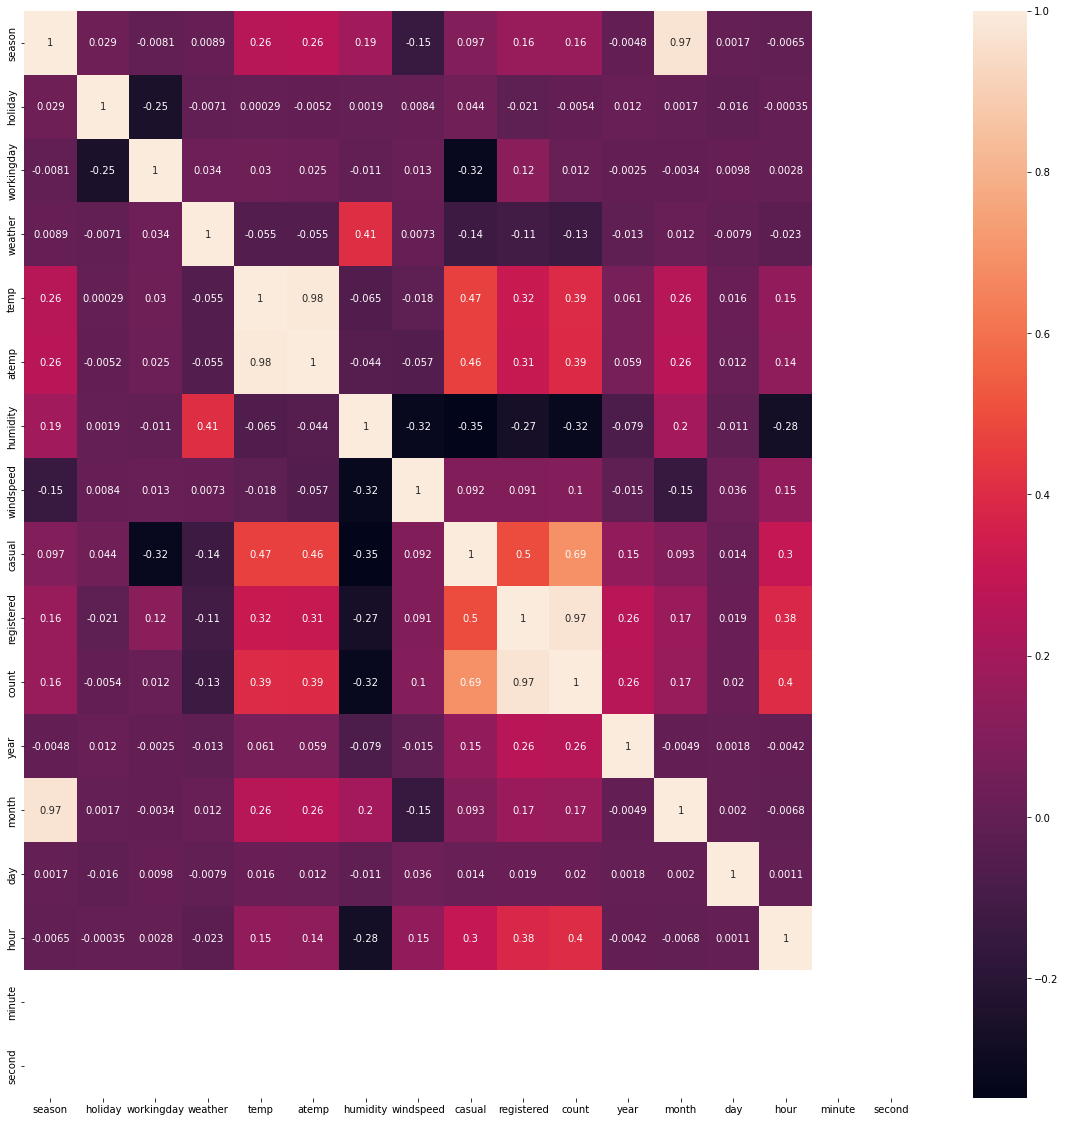

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(bike.corr(),annot = True)

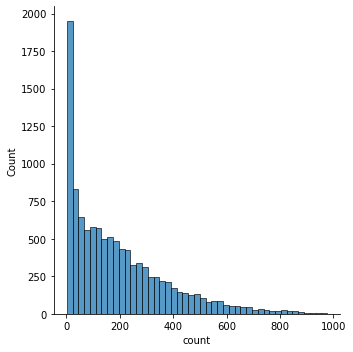

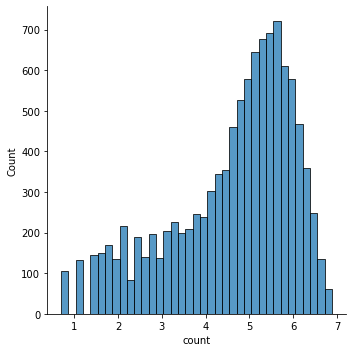

In [29]:
sns.displot(bike['count'])
sns.displot(np.log1p(bike['count']))